# **EVA** TEXT CLASSIFIER

![img_ppal](https://www.innovacion-tecnologia.com/wp-content/uploads/2020/09/Historia-de-los-humanoides.jpg)

## *ÍNDICE* 
---
0. INTRODUCCIÓN
1. **MACHINE LEARNING**
    - 1.1. Librerias, constantes y carga de datos
    - 1.2. Creación y comparación de modelos
    - 1.3. Resultados/predicciones
    - 1.4. Observaciones
2. DEEP LEARNING
    - 2.1. Librerias, constantes y carga de datos
    - 2.2. Creación y comparación de modelos
    - 2.3. Resultados/predicciones
    - 2.4. Observaciones
---

# ***MACHINE LEARNING: NLP data processing***

---

### Librerías

In [3]:
from utils.libreries import *
from utils.functions import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Definir constantes

In [4]:
REL_PATH = os.getcwd()
TRAIN_PATH = REL_PATH + '/data/raw/train.csv'
TEST_PATH = REL_PATH + '/data/raw/test.csv'

### Datasets

In [5]:
ds_train = pd.read_csv(TRAIN_PATH)
ds_train.head()

,train_idx,text,label,label_text
0,0,i really do recommend this to anyone in need o...,1,positive
1,1,very good every day camera fits nicely in the ...,1,positive
2,2,"but , dollar for dollar , this dvd player is p...",1,positive
3,3,i got this phone yesterday and didn ' t find a...,1,positive
4,4,1 ) price gb of storage,1,positive


In [6]:
ds_train.head(20)

,train_idx,text,label,label_text
0,0,i really do recommend this to anyone in need o...,1,positive
1,1,very good every day camera fits nicely in the ...,1,positive
2,2,"but , dollar for dollar , this dvd player is p...",1,positive
3,3,i got this phone yesterday and didn ' t find a...,1,positive
4,4,1 ) price gb of storage,1,positive
5,5,one cabinet shop has been using one regularly ...,1,positive
6,6,i will say that the os that the phone runs doe...,0,negative
7,7,this model appears to be especially good,1,positive
8,8,i find that it is stable in my hands and its '...,1,positive
9,9,"the catch is that , while it plays movies just...",0,negative


In [7]:
ds_test = pd.read_csv(TEST_PATH)
ds_test.head()

,test_idx,text
0,0,fm receiver it has none
1,1,"the picture quality surprised me , when i firs..."
2,2,great video clip quality for a digital camera ...
3,3,creative did well on its rechargeable battery ...
4,4,i highly recommend this camera to anyone looki...


### Preprocesado

In [ ]:
# Descargar el lematizador de WordNet
#nltk.download('wordnet')
# Descargar el conjunto de stopwords
#nltk.download('stopwords')

#nltk.download('omw-1.4')

In [8]:
df_train = ds_train

In [9]:
sentence = df_train['text'][1]
print('SENTENCE:',sentence)
sentiment_scores(sentence)


SENTENCE: very good every day camera fits nicely in the pocket of my jeans and takes quality photos
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7264}
sentence was rated as  0.0 % Negative
sentence was rated as  71.1 % Neutral
sentence was rated as  28.9 % Positive
Sentence Overall Rated As Positive


In [10]:
# Aplicar el preprocesamiento a la columna 'text'
df_train['text'] = df_train['text'].apply(preprocess_text)

In [11]:
df_train.head()

,train_idx,text,label,label_text
0,0,really recommend anyone need new player,1,positive
1,1,good every day camera fit nicely pocket jean t...,1,positive
2,2,dollar dollar dvd player probably best,1,positive
3,3,got phone yesterday find problem yet,1,positive
4,4,1 price gb storage,1,positive


In [12]:
df_train.to_csv('data/processed/train_processed.csv',index=False)

In [13]:
ds_train.head()

,train_idx,text,label,label_text
0,0,really recommend anyone need new player,1,positive
1,1,good every day camera fit nicely pocket jean t...,1,positive
2,2,dollar dollar dvd player probably best,1,positive
3,3,got phone yesterday find problem yet,1,positive
4,4,1 price gb storage,1,positive


In [16]:
df=pd.read_csv('data/processed/train_processed.csv')

### Primer modelo de prueba

In [20]:
# Vectorización de los datos de texto utilizando TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['text'])

# División del dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, df_train['label'], test_size=0.2, random_state=42)

# Entrenamiento del modelo de clasificación
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predicción del conjunto de prueba y cálculo de la precisión
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy del modelo:', accuracy)


Accuracy del modelo: 0.7549668874172185


In [17]:
eval_metrics(y_pred,y_test)

{'ACC': 0.7549668874172185,
 'Precision': 0.7369439071566731,
 'Recall': 0.9694656488549618,
 'F1': 0.8373626373626375,
 'ROC': 0.6624579429108932,
 'Jaccard': 0.720226843100189}

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


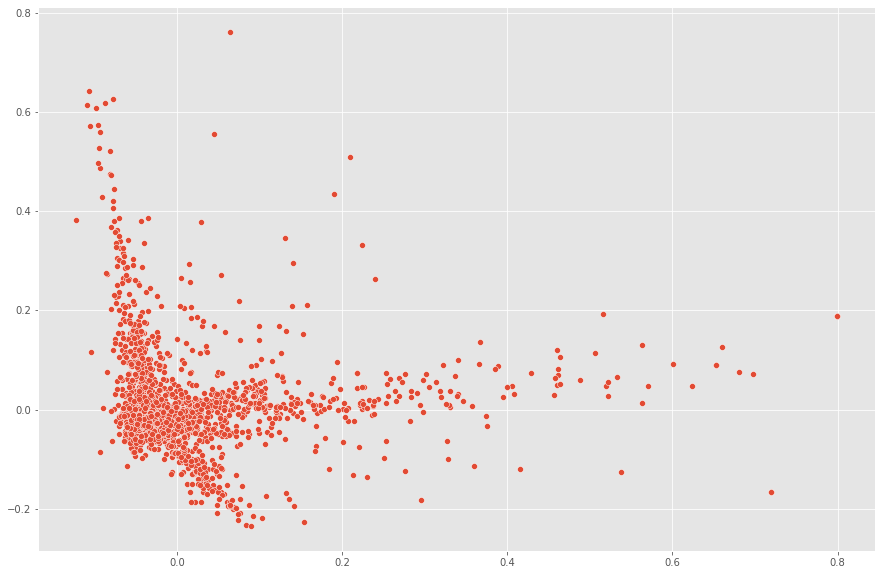

In [47]:
# Reducción de dimensionalidad
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(X.toarray())

# Visualización
plt.figure(figsize=(15,10))
plt.style.use('ggplot')

sns.scatterplot(vectors_pca[:,0], vectors_pca[:,1])

plt.show()

In [21]:
mask = (ds_train["label"] == 1)
df_rating1 = df_train[mask]
mask = (ds_train["label"] == 0)
df_rating2 = ds_train[mask]


df_rating1['text'] = df_rating1['text'].apply(preprocess_text)
df_rating2['text'] = df_rating2['text'].apply(preprocess_text)


df_rating1['Num_words_text'] = df_rating1['text'].apply(lambda x:len(str(x).split())) 
df_rating2['Num_words_text'] = df_rating2['text'].apply(lambda x:len(str(x).split()))

/var/folders/p2/3cl0mklj57l85sps3wtpny_w0000gn/T/ipykernel_27629/573688610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating1['text'] = df_rating1['text'].apply(preprocess_text)
/var/folders/p2/3cl0mklj57l85sps3wtpny_w0000gn/T/ipykernel_27629/573688610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating2['text'] = df_rating2['text'].apply(preprocess_text)
/var/folders/p2/3cl0mklj57l85sps3wtpny_w0000gn/T/ipykernel_27629/573688610.py:11: SettingWithCopyWarning: 
A value is trying to be s

In [22]:
print('Frases positivas:',len(df_rating1))
print('Frases negativas:',len(df_rating2))

Frases positivas: 1926
Frases negativas: 1090


(-0.5, 1599.5, 799.5, -0.5)

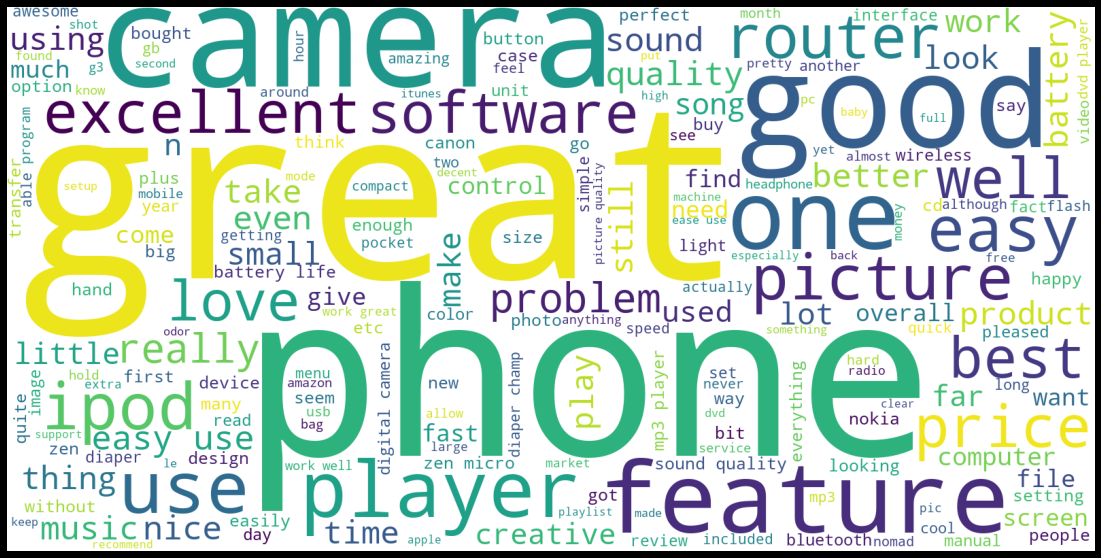

In [25]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating1['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')

In [48]:
palabras_filtradas_totales = pd.DataFrame()
total_palabras=0
for texto in df_train['text']:
    # Convertir el texto en una lista de palabras
    palabras = nltk.tokenize.word_tokenize(texto.lower())

    # Eliminar las stopwords
    palabras_filtradas = pd.DataFrame([palabra for palabra in palabras if palabra not in stopwords.words('english')])
    
    # Comprobacion
    total_palabras=total_palabras+len(palabras_filtradas)
    palabras_filtradas_totales = pd.concat([palabras_filtradas_totales,palabras_filtradas])

In [49]:
total_palabras

26755

In [41]:
len(palabras_filtradas_totales)

26755

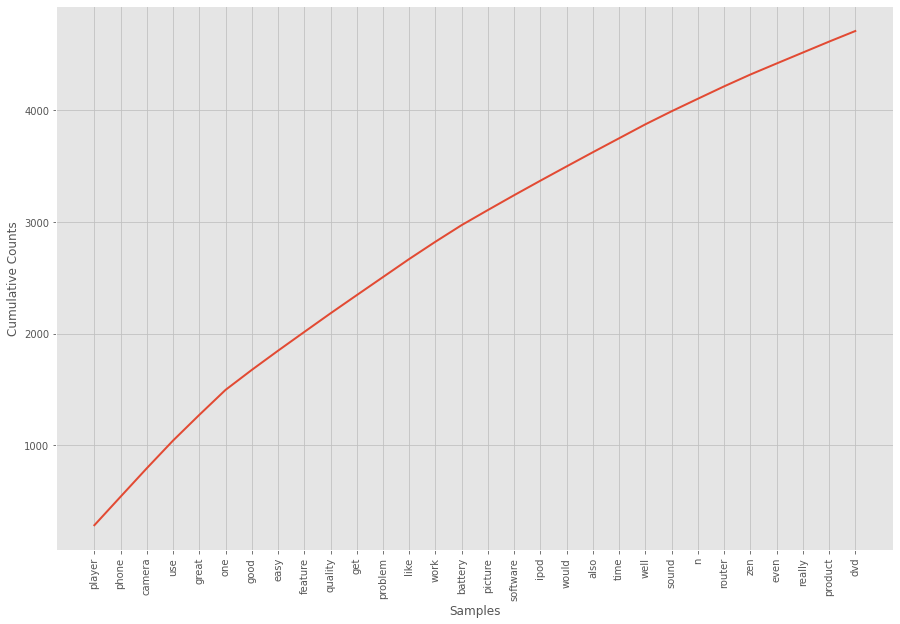

In [46]:
# Obtener la frecuencia de cada palabra
frecuencia = FreqDist(list(palabras_filtradas_totales[0]))

# Graficar las palabras más comunes
plt.figure(figsize=(15,10))
frecuencia.plot(30, cumulative=True)

plt.show()

## OBSERVACIONES:
- Se realiza el preprocesado de los datos.
- Se entrena un modelo y se evalua, consiguiendo unas métricas relativamente buenas
- Se visualizan las palabras más comunes en el dataset
